In [2]:
import numpy as np
import pandas as pd
from urllib.request import urlopen
import requests


In [6]:
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from scipy import stats
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
a = pd.read_csv("https://raw.githubusercontent.com/jaysetty/machine_learning/master/Cust_Spend_Data.csv")

a.head()

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4
3,4,D,6500,5,1,1,4
4,5,E,6000,6,0,12,3


In [10]:
a_new = a.drop(['Cust_ID','Name'],axis = 1)

In [13]:
a_new

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,10000,2,1,1,0
1,7000,3,0,10,9
2,7000,7,1,3,4
3,6500,5,1,1,4
4,6000,6,0,12,3
5,4000,3,0,1,8
6,2500,5,0,11,2
7,2500,3,0,1,1
8,2000,2,0,2,2
9,1000,4,0,1,7


In [14]:
a_new_z = a_new.apply(zscore)
a_new_z

,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


In [16]:
from sklearn.preprocessing import scale as scale

In [17]:
scaled_a = scale(a.ix[:,2:7])
scaled_a

C:\Users\TARUN AERVA TEJA\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([[ 1.88649751, -1.24034735,  1.52752523, -0.74143264, -1.38013112],
       [ 0.78756692, -0.62017367, -0.65465367,  1.28065638,  1.7251639 ],
       [ 0.78756692,  1.86052102,  1.52752523, -0.29207953,  0.        ],
       [ 0.60441182,  0.62017367,  1.52752523, -0.74143264,  0.        ],
       [ 0.42125673,  1.24034735, -0.65465367,  1.7300095 , -0.34503278],
       [-0.31136367, -0.62017367, -0.65465367, -0.74143264,  1.38013112],
       [-0.86082896,  0.62017367, -0.65465367,  1.50533294, -0.69006556],
       [-0.86082896, -0.62017367, -0.65465367, -0.74143264, -1.03509834],
       [-1.04398406, -1.24034735, -0.65465367, -0.51675608, -0.69006556],
       [-1.41029426,  0.        , -0.65465367, -0.74143264,  1.03509834]])

# Without scaling

# **Distance computation**

In [30]:
from scipy.spatial.distance import pdist, squareform

In [35]:
d_euc = pdist(a.iloc[:,2:7],metric = 'euclidean')
d_euc

array([3000.02733321, 3000.00749999, 3500.00357143, 4000.01837496,
       6000.0055    , 7500.0076    , 7500.0002    , 8000.000375  ,
       9000.003     ,    9.53939201,  500.11098768, 1000.0244997 ,
       3000.01366664, 4500.006     , 4500.01611108, 5000.01139999,
       6000.00716666,  500.00799994, 1000.04199912, 3000.00616666,
       4500.0081111 , 4500.00333333, 5000.0031    , 6000.00191667,
        500.12398463, 2500.0042    , 4000.01312498, 4000.00175   ,
       4500.00166667, 5500.001     , 2000.03874962, 3500.00042857,
       3500.0191428 , 4000.01462497, 5000.01409998, 1500.04666594,
       1500.01633324, 2000.00949998, 3000.00033333,   10.24695077,
        500.0899919 , 1500.04199941,  500.00299999, 1500.01233328,
       1000.01499989])

**Building the Clusters**

In [37]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [40]:
clus1 = linkage(d_euc,method = 'average')
clus1

array([[1.00000000e+00, 2.00000000e+00, 9.53939201e+00, 2.00000000e+00],
       [6.00000000e+00, 7.00000000e+00, 1.02469508e+01, 2.00000000e+00],
       [8.00000000e+00, 1.10000000e+01, 5.00046496e+02, 3.00000000e+00],
       [3.00000000e+00, 1.00000000e+01, 5.00059494e+02, 3.00000000e+00],
       [4.00000000e+00, 1.30000000e+01, 8.33396828e+02, 4.00000000e+00],
       [9.00000000e+00, 1.20000000e+01, 1.33335644e+03, 4.00000000e+00],
       [5.00000000e+00, 1.50000000e+01, 2.00001821e+03, 5.00000000e+00],
       [0.00000000e+00, 1.40000000e+01, 3.37501419e+03, 5.00000000e+00],
       [1.60000000e+01, 1.70000000e+01, 4.90000810e+03, 1.00000000e+01]])

**Displaying the clusters in Dendrogram**

In [41]:
import matplotlib.pyplot as plt

In [45]:
a.iloc[:,1]

0    A
1    B
2    C
3    D
4    E
5    F
6    G
7    H
8    I
9    J
Name: Name, dtype: object

Text(0.5,0.98,'Cluster Dendrogram')

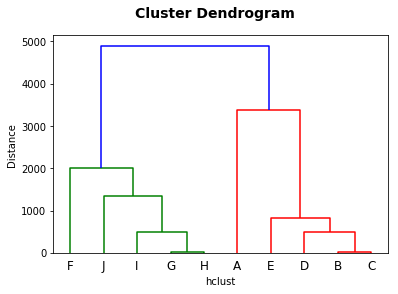

In [64]:
dendrogram(clus1, labels = a.iloc[:,1].values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram',fontweight = 'bold', fontsize=14)

# With Scaling

In [51]:
scaled = pd.DataFrame(scaled_a)
scaled

,0,1,2,3,4
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


In [57]:
scaled.iloc[:,:]

,0,1,2,3,4
0,1.886498,-1.240347,1.527525,-0.741433,-1.380131
1,0.787567,-0.620174,-0.654654,1.280656,1.725164
2,0.787567,1.860521,1.527525,-0.292080,0.000000
3,0.604412,0.620174,1.527525,-0.741433,0.000000
4,0.421257,1.240347,-0.654654,1.730009,-0.345033
5,-0.311364,-0.620174,-0.654654,-0.741433,1.380131
6,-0.860829,0.620174,-0.654654,1.505333,-0.690066
7,-0.860829,-0.620174,-0.654654,-0.741433,-1.035098
8,-1.043984,-1.240347,-0.654654,-0.516756,-0.690066
9,-1.410294,0.000000,-0.654654,-0.741433,1.035098


In [58]:
d_euc_sca = pdist(scaled.iloc[:,:],metric = 'euclidean')
d_euc_sca

array([4.4817262 , 3.59579104, 2.64764878, 4.49912617, 4.19477789,
       4.61469306, 3.57957686, 3.7250902 , 4.79609587, 4.04542206,
       3.66045716, 2.84312401, 2.3271313 , 3.18425555, 3.79803905,
       3.57815864, 3.12733811, 1.33188797, 3.0803563 , 3.77227776,
       3.56713573, 3.86086865, 4.2730011 , 3.78515307, 3.37744575,
       3.00728664, 3.5260433 , 3.08524317, 3.38634349, 3.20577437,
       3.61697219, 1.48252699, 3.41899092, 3.6698474 , 3.59246833,
       3.34275986, 2.47694276, 2.29293303, 1.30817103, 2.58949121,
       2.75389329, 2.95138502, 0.76660834, 2.22985241, 2.16779029])

In [59]:
clus1_sca = linkage(d_euc_sca,method = 'average')
clus1_sca

array([[ 7.        ,  8.        ,  0.76660834,  2.        ],
       [ 5.        ,  9.        ,  1.30817103,  2.        ],
       [ 2.        ,  3.        ,  1.33188797,  2.        ],
       [ 4.        ,  6.        ,  1.48252699,  2.        ],
       [10.        , 11.        ,  2.29187962,  4.        ],
       [ 1.        , 13.        ,  3.01368978,  3.        ],
       [ 0.        , 12.        ,  3.12171991,  3.        ],
       [14.        , 15.        ,  3.23053961,  7.        ],
       [16.        , 17.        ,  3.78685213, 10.        ]])

Text(0.5,0.98,'Cluster Dendrogram')

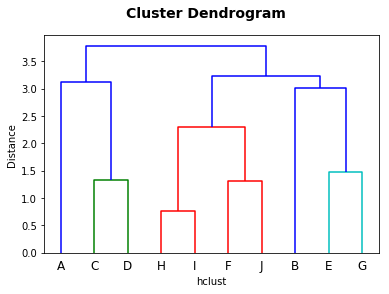

In [63]:
dendrogram(clus1_sca, labels = a.iloc[:,1].values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster Dendrogram',fontweight = 'bold', fontsize=14)